## Collect Data ##
Data is collected in yolov8 format from the roboflow website, unzipped into the local directory, and the zip file is removed.

In [ ]:
!curl -L "https://universe.roboflow.com/ds/SyscZfAukn?key=XXXXXXXXXX" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

Streaming output truncated to the last 5000 lines.
 extracting: train/labels/img-194_jpg.rf.3d402440b05240d8ae1fb45c2518bd12.txt  
 extracting: train/labels/img-194_jpg.rf.451a151c42e6a378d8d3119559848885.txt  
 extracting: train/labels/img-194_jpg.rf.833e974610b62a4a32695c69924e9248.txt  
 extracting: train/labels/img-194_jpg.rf.b7d8e235ffbed5d49b386a99df6d3ae7.txt  
 extracting: train/labels/img-194_jpg.rf.f9f558a6ab0cfa87ace40ce5a63bae1d.txt  
 extracting: train/labels/img-195_jpg.rf.00ebe25b760566301271f496ac9c625b.txt  
 extracting: train/labels/img-195_jpg.rf.7c11e45f189a16118e985e17242adc74.txt  
 extracting: train/labels/img-195_jpg.rf.88803b9934e1de3404239cebd030bf5a.txt  
 extracting: train/labels/img-196_jpg.rf.1b2d36e015db1434e1a339a0800835a5.txt  
 extracting: train/labels/img-196_jpg.rf.31fd40d6d8b6e8240f018a072075f860.txt  
 extracting: train/labels/img-196_jpg.rf.3cb01ea20675a57ad6250ec1b57727bd.txt  
 extracting: train/labels/img-196_jpg.rf.672e136e4753d8294153ee4e27de

## Install Ultralytics ##
We will be transfer learning with the Ultralytics medium detection yolov11 model and need to install the ultralytics package which is not installed by default to colab.

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 102.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 98.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninst

## Verify Installation ##
Verifying that we can run yolo command.

In [ ]:
!yolo

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

    Arguments received: ['yolo']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of frozenset({'detect', 'pose', 'segment', 'classify', 'obb'})
                MODE (required) is one of frozenset({'val', 'track', 'export', 'benchmark', 'train', 'predict'})
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://docs.ultralytics.com/usage/cfg or with 'yolo cfg'

    1. Train a detection model for 10 epochs with an initial learning_rate of 0.01
        yolo train data=coco8.yaml model=yolo11n.pt epochs=10

## Training the Model ##
Here we transfer learn the pretrained model on our dataset and save the best model.

In [ ]:
from ultralytics import YOLO # import YOLO

# load the pretrained weights from the model downloaded at https://docs.ultralytics.com/tasks/detect/#models
model = YOLO('yolo11m.pt') 

# Train the model
# the data.yaml file contains information about the file structure and data structure required for the model to run.
# training for 200 epochs which is less than recommended (300) but done to limit credit usage
# using a typical image size of 640px, patience of 50 means if no improvement in 50 epochs we can stop early
# setting batchsize to -1 will use 60% of the GPU memory (~20GB), plots = True will generate statistics plots
results = model.train(data='/content/data.yaml', epochs=200, imgsz=640, patience=50, batch=-1,plots=True)

# saving the best weights
model.save('best_yolo_model.pt')

100%|██████████| 38.8M/38.8M [00:00<00:00, 495MB/s]


Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=/content/data.yaml, epochs=200, time=None, patience=50, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_

100%|██████████| 755k/755k [00:00<00:00, 153MB/s]


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 363MB/s]


AMP: checks passed ✅


train: Scanning /content/train/labels... 8214 images, 1346 backgrounds, 0 corrupt: 100%|██████████| 8214/8214 [00:05<00:00, 1555.00it/s]


train: New cache created: /content/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA A100-SXM4-40GB) 39.56G total, 0.21G reserved, 0.19G allocated, 39.15G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
    20057634       68.21         1.699          54.6         241.7        (1, 3, 640, 640)                    list
    20057634       136.4         2.326         44.68         121.4        (2, 3, 640, 640)                    list
    20057634       272.8         3.399         49.17         115.5        (4, 3, 640, 640)                    list
    20057634       545.7         5.627         54.42         113.8        (8, 3, 64

train: Scanning /content/train/labels.cache... 8214 images, 1346 backgrounds, 0 corrupt: 100%|██████████| 8214/8214 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/valid/labels... 783 images, 138 backgrounds, 0 corrupt: 100%|██████████| 783/783 [00:00<00:00, 1234.90it/s]

val: New cache created: /content/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.000359375), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      22.1G       1.74      3.083      1.679        112        640: 100%|██████████| 179/179 [01:03<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.95it/s]

                   all        783       2330      0.374      0.393       0.31      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200        22G      1.498       1.92      1.422        115        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.37it/s]

                   all        783       2330      0.381      0.225      0.144     0.0773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200        22G      1.629      2.059      1.528        102        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.06it/s]

                   all        783       2330     0.0646      0.117     0.0212    0.00911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200        22G       1.71      2.171      1.606        119        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.02it/s]

                   all        783       2330       0.23      0.127     0.0528     0.0274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      21.9G      1.595      1.959      1.546        126        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.39it/s]

                   all        783       2330      0.139      0.216     0.0626     0.0256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200        22G      1.522      1.835      1.492        133        640: 100%|██████████| 179/179 [01:02<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.34it/s]

                   all        783       2330       0.31      0.357      0.243      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200        22G      1.466       1.73      1.456        108        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.42it/s]

                   all        783       2330      0.436      0.439      0.381      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      21.9G      1.432      1.645      1.433         92        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.41it/s]

                   all        783       2330      0.296      0.221      0.172     0.0988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200        22G      1.399      1.574      1.404        117        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.41it/s]

                   all        783       2330      0.446       0.48      0.404      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      21.9G      1.361      1.516      1.389        122        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.38it/s]

                   all        783       2330      0.454      0.432      0.381      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200        22G      1.344      1.483      1.366        130        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.45it/s]

                   all        783       2330      0.497      0.515      0.498      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200        22G      1.315      1.427      1.354        139        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.42it/s]

                   all        783       2330      0.505      0.478      0.467      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200        22G      1.295      1.383       1.34        105        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.47it/s]

                   all        783       2330       0.48      0.567      0.536      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200        22G      1.268      1.358      1.325        127        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.46it/s]

                   all        783       2330      0.569      0.563      0.569      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200        22G       1.25      1.322      1.316        122        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.41it/s]

                   all        783       2330      0.581       0.44       0.45      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      21.9G      1.233      1.292      1.299        121        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.32it/s]

                   all        783       2330      0.513      0.526      0.508      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      22.1G       1.23      1.268      1.294        123        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.46it/s]

                   all        783       2330      0.504       0.57      0.531      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200        22G        1.2      1.239       1.28        114        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.48it/s]

                   all        783       2330      0.526      0.438      0.428      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200        22G      1.192      1.221      1.272        163        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.47it/s]

                   all        783       2330      0.554      0.583       0.58      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200        22G      1.174      1.179      1.258        136        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.50it/s]

                   all        783       2330      0.643      0.604      0.626      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200        22G      1.159      1.151      1.251         87        640: 100%|██████████| 179/179 [01:02<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.48it/s]

                   all        783       2330      0.532      0.497      0.481      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200        22G      1.156      1.139      1.245        116        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.47it/s]

                   all        783       2330      0.615      0.619      0.634      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      21.9G      1.134      1.122      1.232        110        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.49it/s]

                   all        783       2330      0.504      0.471      0.465      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200        22G      1.126      1.093      1.217        131        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.50it/s]

                   all        783       2330       0.64      0.653      0.665      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200        22G      1.116      1.082      1.216        152        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.49it/s]

                   all        783       2330      0.655      0.619      0.636        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200        22G       1.11      1.047      1.216        137        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.48it/s]

                   all        783       2330      0.612      0.648      0.651      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200        22G      1.097      1.034      1.203        139        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.50it/s]

                   all        783       2330      0.642      0.668      0.672      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200        22G       1.09      1.025      1.197         85        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.49it/s]

                   all        783       2330      0.629      0.654       0.66      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200        22G      1.087      1.018      1.196         97        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.50it/s]

                   all        783       2330       0.62      0.652       0.64      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200        22G      1.064     0.9904      1.185         86        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.49it/s]

                   all        783       2330      0.669      0.659      0.676      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      21.9G      1.054     0.9761      1.171        141        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.51it/s]

                   all        783       2330      0.674      0.664      0.683      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200        22G       1.05     0.9657      1.169        129        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.50it/s]

                   all        783       2330      0.647      0.644      0.667      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200        22G      1.039     0.9405      1.164        121        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.49it/s]

                   all        783       2330      0.688      0.688      0.723      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200        22G      1.025     0.9272      1.154         88        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.50it/s]

                   all        783       2330      0.694       0.71      0.726      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200        22G       1.02     0.9144      1.155        111        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.47it/s]

                   all        783       2330      0.706      0.704       0.73      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      21.9G      1.009     0.9019      1.146        161        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.50it/s]

                   all        783       2330      0.702      0.699      0.726      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200        22G      1.007      0.892      1.139        117        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.47it/s]

                   all        783       2330      0.693       0.71      0.725      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      21.9G     0.9973     0.8853      1.136        123        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.48it/s]

                   all        783       2330      0.719      0.723      0.749      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200        22G     0.9894     0.8614      1.128        113        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.46it/s]

                   all        783       2330      0.732      0.712      0.741      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200        22G     0.9825     0.8549      1.127        144        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.51it/s]

                   all        783       2330      0.733      0.712      0.743      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200        22G     0.9704     0.8463       1.12        106        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.50it/s]

                   all        783       2330      0.711      0.691      0.715      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200        22G     0.9641     0.8329      1.113        136        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.46it/s]

                   all        783       2330      0.737       0.71      0.751      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200        22G      0.951     0.8155      1.111        130        640: 100%|██████████| 179/179 [01:02<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.52it/s]

                   all        783       2330      0.721      0.726      0.743      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200        22G     0.9531     0.8147      1.107        164        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.49it/s]

                   all        783       2330      0.743      0.738      0.763      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200        22G     0.9402     0.7941      1.096        109        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.49it/s]

                   all        783       2330      0.722       0.74      0.764       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200        22G     0.9378     0.7854        1.1        123        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.49it/s]

                   all        783       2330      0.747      0.734      0.764      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200        22G       0.93     0.7788       1.09        102        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.51it/s]

                   all        783       2330      0.775      0.738       0.78      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200        22G     0.9245     0.7639      1.089        121        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.50it/s]

                   all        783       2330      0.745      0.751      0.776      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200        22G     0.9234     0.7676      1.089        112        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.49it/s]

                   all        783       2330      0.752      0.741      0.773      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200        22G     0.9052     0.7546      1.079        111        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.52it/s]

                   all        783       2330      0.761      0.741      0.782      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200        22G     0.9103      0.751       1.08        108        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.50it/s]

                   all        783       2330      0.754      0.754      0.779      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200        22G     0.9036     0.7428      1.077        111        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.48it/s]

                   all        783       2330       0.76      0.744      0.778      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200        22G     0.8953     0.7302      1.072        102        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.49it/s]

                   all        783       2330      0.759      0.756      0.781       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200        22G     0.8968     0.7295       1.07         97        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.48it/s]

                   all        783       2330      0.776      0.764       0.79      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200        22G     0.8839     0.7161      1.063        103        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.52it/s]

                   all        783       2330      0.748       0.76      0.784      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200        22G     0.8823     0.7151      1.058        123        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.48it/s]

                   all        783       2330      0.746      0.772      0.793      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      21.9G     0.8759     0.7042      1.059        113        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.49it/s]

                   all        783       2330      0.759      0.771      0.796      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200        22G     0.8712     0.7025      1.054        142        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.52it/s]

                   all        783       2330      0.753      0.771      0.795      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200        22G      0.861     0.6884      1.049        101        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.53it/s]

                   all        783       2330      0.761      0.768      0.793       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200        22G     0.8645      0.693      1.054        111        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.50it/s]

                   all        783       2330      0.757      0.775      0.794      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200        22G     0.8539     0.6774      1.042        119        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.54it/s]

                   all        783       2330       0.77       0.77      0.797       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200        22G     0.8505     0.6715       1.04        113        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.52it/s]

                   all        783       2330      0.754      0.762      0.795       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200        22G     0.8366     0.6594      1.034        146        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.50it/s]

                   all        783       2330      0.758      0.768      0.795      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200        22G      0.839     0.6582      1.036        105        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.52it/s]

                   all        783       2330      0.776      0.769      0.805      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200        22G     0.8304     0.6497      1.025        147        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.50it/s]

                   all        783       2330      0.787      0.762      0.801      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      21.9G      0.833     0.6511      1.026        135        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.49it/s]

                   all        783       2330      0.771      0.772      0.801      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200        22G     0.8255      0.638      1.027        114        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.51it/s]

                   all        783       2330      0.766      0.768      0.801      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200        22G     0.8145     0.6314      1.017        106        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.51it/s]

                   all        783       2330       0.77      0.771      0.804      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      21.8G     0.8265     0.6433      1.025        103        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.51it/s]

                   all        783       2330      0.784      0.762      0.802       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      21.9G     0.8114     0.6236      1.017         97        640: 100%|██████████| 179/179 [01:02<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.51it/s]

                   all        783       2330      0.778      0.767        0.8      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200        22G     0.8097     0.6232      1.019         90        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.50it/s]

                   all        783       2330      0.776      0.766      0.803      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200        22G     0.8083     0.6242      1.015        101        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.51it/s]

                   all        783       2330      0.782      0.775      0.805      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200        22G     0.8063     0.6148      1.012        156        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.50it/s]

                   all        783       2330      0.784      0.771      0.803      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200        22G     0.7852     0.6062      1.006        115        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.50it/s]

                   all        783       2330      0.777      0.779      0.808        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200        22G     0.7954     0.6041      1.006        115        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.52it/s]

                   all        783       2330      0.779      0.779      0.809      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200        22G     0.7835     0.5953      1.005        106        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.51it/s]

                   all        783       2330      0.787      0.778      0.814      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200        22G     0.7805     0.5947      1.001         87        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.51it/s]

                   all        783       2330      0.793      0.778      0.819      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      21.9G     0.7771     0.5865      0.999        115        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.51it/s]

                   all        783       2330      0.795      0.779       0.82      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200        22G     0.7777     0.5877     0.9971        103        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.52it/s]

                   all        783       2330      0.797      0.779      0.819      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200        22G     0.7771     0.5882     0.9995        111        640: 100%|██████████| 179/179 [01:02<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.49it/s]

                   all        783       2330      0.799       0.78      0.819      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200        22G     0.7667     0.5732     0.9951        123        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.52it/s]

                   all        783       2330      0.798      0.778      0.819      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200        22G     0.7616     0.5702     0.9914        111        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.52it/s]

                   all        783       2330      0.793      0.782      0.819      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200        22G     0.7586     0.5653     0.9905        139        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.50it/s]

                   all        783       2330      0.798       0.78       0.82      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      21.9G     0.7529     0.5631     0.9872        152        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.52it/s]

                   all        783       2330      0.796       0.78      0.819      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200        22G     0.7541      0.557     0.9866        119        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.51it/s]

                   all        783       2330      0.798      0.779      0.819      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200        22G     0.7522     0.5585     0.9852        131        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.52it/s]

                   all        783       2330        0.8      0.778       0.82       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200        22G     0.7442     0.5504     0.9812        121        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.52it/s]

                   all        783       2330      0.798      0.782      0.822      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200        22G     0.7377     0.5466      0.981        122        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.53it/s]

                   all        783       2330      0.799      0.785      0.823      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200        22G     0.7393     0.5455     0.9791        101        640: 100%|██████████| 179/179 [01:02<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.52it/s]

                   all        783       2330      0.801      0.784      0.823      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200        22G     0.7342     0.5402     0.9736        146        640: 100%|██████████| 179/179 [01:02<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.49it/s]

                   all        783       2330      0.802      0.785      0.822      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200        22G     0.7327     0.5369     0.9764        138        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.50it/s]

                   all        783       2330      0.801      0.785      0.823      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200        22G      0.727     0.5311     0.9696        109        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.52it/s]

                   all        783       2330      0.804      0.783      0.825      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      21.8G     0.7238     0.5325     0.9689        147        640: 100%|██████████| 179/179 [01:02<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.50it/s]

                   all        783       2330      0.806      0.785      0.827      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      21.9G     0.7243     0.5279      0.968        132        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.53it/s]

                   all        783       2330      0.811      0.783      0.828      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      21.9G     0.7109     0.5199     0.9659        127        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.52it/s]

                   all        783       2330       0.81      0.783      0.827      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200        22G     0.7128     0.5215     0.9665        139        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.53it/s]

                   all        783       2330      0.807      0.787      0.827      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200        22G     0.7096     0.5169     0.9655        152        640: 100%|██████████| 179/179 [01:02<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.52it/s]

                   all        783       2330      0.809      0.788      0.829      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200        22G     0.7105     0.5187     0.9692         85        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.53it/s]

                   all        783       2330      0.805       0.79       0.83      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200        22G       0.71     0.5163     0.9623        112        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.54it/s]

                   all        783       2330      0.804      0.791       0.83      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200        22G     0.7012     0.5158     0.9627        107        640: 100%|██████████| 179/179 [01:02<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.52it/s]

                   all        783       2330      0.809      0.789       0.83       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      21.9G     0.6976     0.5025     0.9582        119        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.53it/s]

                   all        783       2330       0.81      0.789      0.831      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200        22G     0.6932      0.498     0.9561        105        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.52it/s]

                   all        783       2330      0.808      0.789      0.831       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200        22G     0.6911     0.5008     0.9551        157        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.54it/s]

                   all        783       2330      0.809       0.79      0.831      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200        22G     0.6846     0.4929     0.9476        125        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.52it/s]

                   all        783       2330      0.812      0.791      0.832      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      21.9G     0.6805     0.4921     0.9502        103        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.53it/s]

                   all        783       2330      0.816       0.79      0.833      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      21.9G     0.6821     0.4914     0.9504        116        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.53it/s]

                   all        783       2330      0.816      0.789      0.832      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200        22G     0.6801     0.4856     0.9471        100        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.53it/s]

                   all        783       2330      0.815      0.789      0.832      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200        22G     0.6807     0.4927     0.9493        161        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.52it/s]

                   all        783       2330      0.817      0.792      0.833      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200        22G     0.6688     0.4764     0.9461         87        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.53it/s]

                   all        783       2330      0.813      0.792      0.833      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200        22G     0.6662     0.4761     0.9432        140        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.53it/s]

                   all        783       2330      0.817       0.79      0.833      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200        22G     0.6667     0.4794     0.9443        102        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.53it/s]

                   all        783       2330      0.811      0.793      0.833      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200        22G     0.6607     0.4745     0.9434        111        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.51it/s]

                   all        783       2330      0.805      0.795      0.833      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200        22G     0.6604     0.4723     0.9443         92        640: 100%|██████████| 179/179 [01:02<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.51it/s]

                   all        783       2330       0.81      0.795      0.834      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200        22G      0.654     0.4678      0.936        118        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.53it/s]

                   all        783       2330      0.815      0.794      0.834      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200        22G     0.6533     0.4691     0.9412         98        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.52it/s]

                   all        783       2330      0.816      0.794      0.835      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      21.9G     0.6516     0.4687     0.9404        130        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.55it/s]

                   all        783       2330      0.818      0.796      0.835      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      21.9G     0.6501     0.4611     0.9361        113        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.52it/s]

                   all        783       2330      0.818      0.797      0.836      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      21.9G     0.6445     0.4589     0.9356        113        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.54it/s]

                   all        783       2330      0.817      0.797      0.836      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200        22G     0.6423     0.4564     0.9371        120        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.53it/s]

                   all        783       2330      0.819      0.798      0.837       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      21.9G     0.6402     0.4533     0.9333        121        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.53it/s]

                   all        783       2330       0.82      0.797      0.837       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200        22G     0.6391      0.452     0.9339        147        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.55it/s]

                   all        783       2330      0.821      0.794      0.837      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      21.9G      0.635     0.4502     0.9319        117        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.51it/s]

                   all        783       2330      0.822      0.794      0.838      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200        22G     0.6337     0.4496     0.9337        150        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.53it/s]

                   all        783       2330       0.82      0.797      0.838      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200        22G     0.6237     0.4411     0.9253        113        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.54it/s]

                   all        783       2330       0.82      0.796      0.837      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200        22G     0.6272     0.4435     0.9276        107        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.55it/s]

                   all        783       2330      0.818      0.797      0.837      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      21.8G     0.6275     0.4432     0.9278         98        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.54it/s]

                   all        783       2330       0.82      0.798      0.839      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      21.9G     0.6173     0.4373     0.9276        133        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.53it/s]

                   all        783       2330      0.817      0.799      0.838      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      21.9G     0.6125     0.4334     0.9238         74        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.53it/s]

                   all        783       2330      0.817      0.798      0.838      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200        22G      0.618     0.4349     0.9251        113        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.54it/s]

                   all        783       2330       0.82      0.798      0.839      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200        22G     0.6088     0.4252     0.9213        121        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.51it/s]

                   all        783       2330       0.82      0.798      0.839      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200        22G      0.606     0.4271     0.9224        130        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.53it/s]

                   all        783       2330      0.821      0.798      0.839      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      21.9G     0.6109     0.4313     0.9205        111        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.55it/s]

                   all        783       2330      0.824      0.797       0.84      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200        22G     0.6013     0.4214     0.9189        101        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.52it/s]

                   all        783       2330      0.824      0.797       0.84      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200        22G      0.601     0.4213      0.919        101        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.54it/s]

                   all        783       2330      0.822      0.796      0.841      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200        22G     0.5956     0.4189     0.9174        133        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.52it/s]

                   all        783       2330      0.823      0.797      0.841      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200        22G     0.5921     0.4156     0.9158         89        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.52it/s]

                   all        783       2330      0.823      0.796      0.841      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200        22G      0.594     0.4146     0.9132        127        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.52it/s]

                   all        783       2330      0.825      0.795      0.841      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      21.9G     0.5881     0.4114      0.915        108        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.54it/s]

                   all        783       2330      0.823      0.798      0.841      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      21.9G     0.5905     0.4132     0.9141        124        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.51it/s]

                   all        783       2330      0.825      0.798      0.842      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200        22G     0.5837       0.41     0.9114        125        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.51it/s]

                   all        783       2330      0.831      0.795      0.842       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200        22G     0.5818     0.4084      0.911        101        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.55it/s]

                   all        783       2330      0.825      0.801      0.844      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200        22G     0.5776     0.4039     0.9099        136        640: 100%|██████████| 179/179 [01:03<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.54it/s]

                   all        783       2330      0.818      0.805      0.844      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200        22G     0.5777     0.4022     0.9101        102        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.51it/s]

                   all        783       2330       0.82      0.804      0.843      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      21.9G     0.5757     0.3979     0.9094        114        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.54it/s]

                   all        783       2330      0.822      0.804      0.844      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200        22G     0.5692     0.3951     0.9085        118        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.52it/s]

                   all        783       2330      0.832      0.798      0.845      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200        22G     0.5654     0.3944     0.9053        107        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.55it/s]

                   all        783       2330      0.838      0.794      0.845      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      21.9G     0.5692     0.3987     0.9082        113        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.55it/s]

                   all        783       2330      0.834      0.797      0.845      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200        22G      0.562     0.3937     0.9053        110        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.52it/s]

                   all        783       2330      0.835      0.797      0.845      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200        22G     0.5602     0.3967     0.9064         90        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.56it/s]

                   all        783       2330      0.834      0.798      0.845      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200        22G     0.5571      0.388     0.9045         85        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.54it/s]

                   all        783       2330      0.833      0.799      0.844      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200        22G     0.5553     0.3857     0.9031        124        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.55it/s]

                   all        783       2330      0.835      0.801      0.844      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      21.8G     0.5505     0.3834     0.9013        114        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.52it/s]

                   all        783       2330      0.833      0.802      0.844      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200        22G     0.5494      0.384      0.903        113        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.56it/s]

                   all        783       2330      0.835        0.8      0.845      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200        22G      0.543     0.3761        0.9         95        640: 100%|██████████| 179/179 [01:02<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.55it/s]

                   all        783       2330      0.836      0.801      0.845      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200        22G     0.5384     0.3713     0.8971         95        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.55it/s]

                   all        783       2330      0.834        0.8      0.845      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200        22G     0.5385     0.3743     0.8988        125        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.54it/s]

                   all        783       2330      0.836        0.8      0.845      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      21.9G     0.5432     0.3795     0.8985        117        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.53it/s]

                   all        783       2330      0.837      0.799      0.846      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200        22G      0.535     0.3749     0.8959        100        640: 100%|██████████| 179/179 [01:02<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.55it/s]

                   all        783       2330      0.836        0.8      0.845      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200        22G     0.5325     0.3697      0.897        105        640: 100%|██████████| 179/179 [01:02<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.55it/s]

                   all        783       2330      0.838      0.801      0.847      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200        22G     0.5316     0.3735     0.8954        105        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.54it/s]

                   all        783       2330      0.839        0.8      0.847      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200        22G      0.531     0.3715     0.8957        101        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.53it/s]

                   all        783       2330      0.841      0.798      0.847      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      21.9G     0.5256     0.3656     0.8931        127        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.56it/s]

                   all        783       2330      0.841      0.797      0.848      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200        22G     0.5227     0.3631     0.8909        121        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.54it/s]

                   all        783       2330      0.843      0.796      0.847      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200        22G     0.5189     0.3634     0.8926        123        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.56it/s]

                   all        783       2330      0.843      0.797      0.848      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200      21.9G     0.5146     0.3596     0.8879         88        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.56it/s]

                   all        783       2330      0.844      0.796      0.847       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200        22G     0.5084      0.355     0.8894        125        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.55it/s]

                   all        783       2330      0.844      0.797      0.848       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200        22G     0.5092     0.3548     0.8881        120        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.55it/s]

                   all        783       2330      0.846      0.798      0.849      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      21.9G     0.5035     0.3485     0.8841        110        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.54it/s]

                   all        783       2330      0.847      0.797      0.849      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      21.9G     0.5054     0.3519     0.8857        132        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.54it/s]

                   all        783       2330      0.848      0.797      0.849      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      21.9G     0.5018     0.3481     0.8862         86        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.55it/s]

                   all        783       2330      0.847      0.797      0.848      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200        22G     0.4987     0.3484     0.8869         98        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.53it/s]

                   all        783       2330      0.855      0.793       0.85      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      21.9G     0.4945     0.3446     0.8877        140        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.55it/s]

                   all        783       2330       0.85      0.797       0.85      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200        22G     0.4924     0.3439     0.8818         78        640: 100%|██████████| 179/179 [01:03<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.52it/s]

                   all        783       2330      0.848      0.798       0.85      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200        22G     0.4952     0.3452     0.8858        106        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.56it/s]

                   all        783       2330      0.849      0.798       0.85      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200        22G     0.4921     0.3443     0.8857         87        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.53it/s]

                   all        783       2330       0.85        0.8      0.851      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200      21.9G     0.4897     0.3415     0.8786        126        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.55it/s]

                   all        783       2330      0.849        0.8       0.85      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200      21.9G     0.4845     0.3361     0.8819         99        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.55it/s]

                   all        783       2330       0.85        0.8       0.85      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      21.9G     0.4779     0.3331     0.8782        115        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.55it/s]

                   all        783       2330      0.855      0.799      0.851      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200        22G     0.4795     0.3346     0.8807        121        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.56it/s]

                   all        783       2330      0.857      0.799      0.851      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200        22G     0.4781     0.3337     0.8785        104        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.55it/s]

                   all        783       2330      0.854      0.799      0.851      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200        22G      0.466     0.3248     0.8758        122        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.56it/s]

                   all        783       2330      0.854      0.799      0.852      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      21.9G     0.4704     0.3254     0.8782        118        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.54it/s]

                   all        783       2330      0.856      0.799      0.852      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200        22G     0.4687      0.326     0.8764        115        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

                   all        783       2330      0.857      0.798      0.852      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200        22G     0.4626     0.3222     0.8752        131        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]

                   all        783       2330       0.86      0.798      0.852       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200        22G     0.4627     0.3229     0.8743         89        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]

                   all        783       2330      0.863      0.797      0.852       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200        22G       0.46     0.3223     0.8742        132        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]

                   all        783       2330      0.863      0.797      0.852       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      21.9G     0.4557     0.3165     0.8738        126        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.56it/s]

                   all        783       2330      0.866      0.797      0.853      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200        22G     0.4528     0.3165     0.8703        104        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.56it/s]

                   all        783       2330      0.867      0.796      0.852      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200      21.9G     0.4497     0.3138     0.8703        112        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.54it/s]

                   all        783       2330      0.868      0.795      0.853      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      21.9G     0.4522     0.3159      0.871        101        640: 100%|██████████| 179/179 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]

                   all        783       2330       0.87      0.795      0.852      0.673


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200        22G     0.4006     0.2504     0.8174         85        640: 100%|██████████| 179/179 [01:04<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.55it/s]

                   all        783       2330      0.862      0.797      0.853      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200        22G     0.3609       0.23     0.8069         84        640: 100%|██████████| 179/179 [01:02<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

                   all        783       2330      0.865      0.792      0.855      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200      21.9G      0.356     0.2274     0.8039         79        640: 100%|██████████| 179/179 [01:02<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

                   all        783       2330      0.873      0.788      0.855      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200        22G     0.3469     0.2222     0.8056         91        640: 100%|██████████| 179/179 [01:02<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.54it/s]

                   all        783       2330      0.872      0.787      0.856      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200        22G     0.3439     0.2212     0.8015         75        640: 100%|██████████| 179/179 [01:02<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

                   all        783       2330      0.872      0.788      0.856      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200        22G     0.3386      0.218     0.8019         65        640: 100%|██████████| 179/179 [01:02<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]

                   all        783       2330      0.875      0.787      0.856      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200        22G      0.341     0.2213      0.804         80        640: 100%|██████████| 179/179 [01:02<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all        783       2330      0.875      0.786      0.857      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200      21.9G     0.3304     0.2136     0.8009         66        640: 100%|██████████| 179/179 [01:02<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]

                   all        783       2330      0.875      0.785      0.857      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200        22G     0.3242     0.2095     0.7982         78        640: 100%|██████████| 179/179 [01:02<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

                   all        783       2330      0.876      0.785      0.857      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      21.9G     0.3276     0.2134     0.7983         75        640: 100%|██████████| 179/179 [01:02<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

                   all        783       2330      0.875      0.786      0.857      0.683



200 epochs completed in 3.751 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 40.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11m summary (fused): 125 layers, 20,034,658 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]


                   all        783       2330      0.877      0.784      0.857      0.683
    alligator cracking        379        592      0.903      0.848      0.915       0.83
         edge cracking        159        232      0.883      0.745      0.833      0.581
 longitudinal cracking        346        689      0.849      0.707      0.786      0.445
              patching        117        151      0.861      0.775       0.85       0.77
               rutting         97        109      0.905       0.89      0.951      0.906
   transverse cracking        335        557      0.863      0.741      0.806      0.567
Speed: 0.1ms preprocess, 1.7ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train



image 1/1 /content/test/images/c_im55_1_1_jpg.rf.abd3ebd131a99fbf373dde8623886b88.jpg: 640x640 2 alligator crackings, 1 transverse cracking, 14.7ms
Speed: 2.0ms preprocess, 14.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


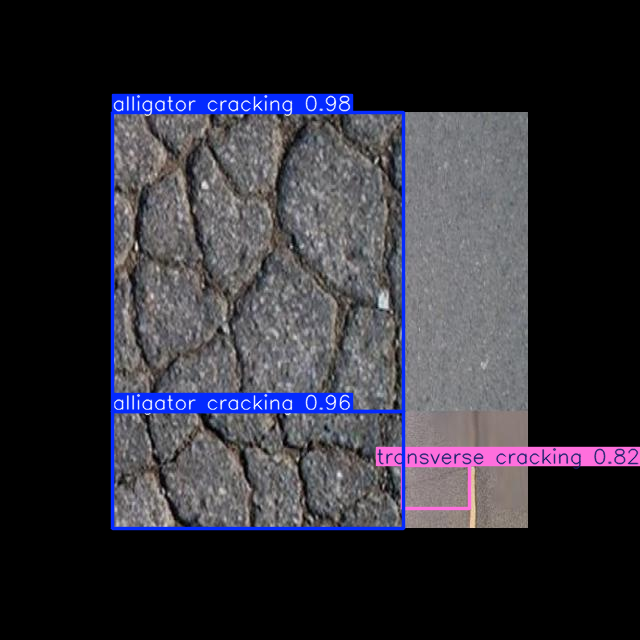

In [ ]:
# loading the best weights
model2 = YOLO('best_yolo_model.pt')

# testing on a random trial image
results = model("/content/test/images/c_im55_1_1_jpg.rf.abd3ebd131a99fbf373dde8623886b88.jpg")

# showing the model results
for result in results:
    result.show()